In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


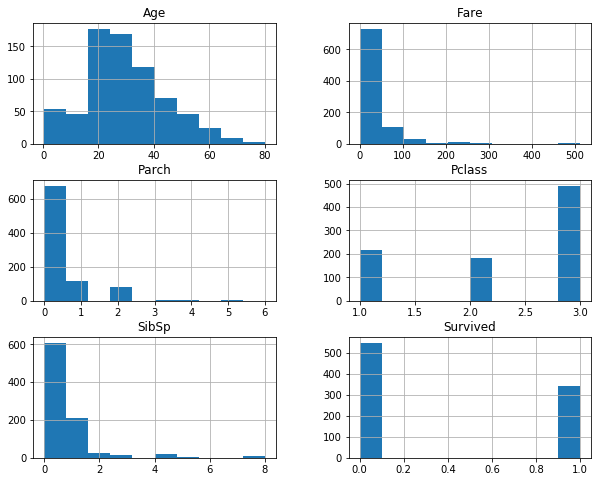

In [9]:
df.hist(figsize= (10,8));

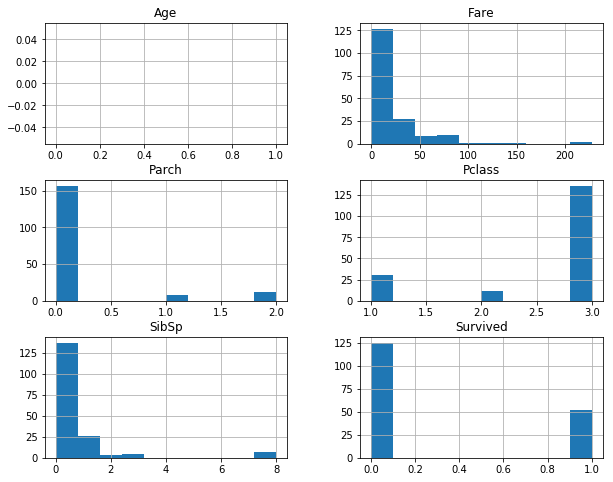

In [10]:
df[df.Age.isnull()].hist(figsize = (10,8));

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [14]:
df.dropna(inplace= True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [16]:
survived = df.Survived == True
died = df.Survived == False

In [17]:
df.Fare[died].mean()

22.117886885245877

In [18]:
df.Fare[survived].mean()

48.209498235294106

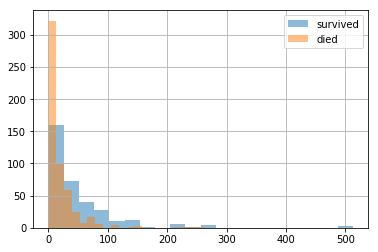

In [19]:
df.Fare[survived].hist(label = 'survived', alpha =0.5, bins =20)
df.Fare[died].hist(label = 'died', alpha = 0.5, bins=20);
plt.legend()

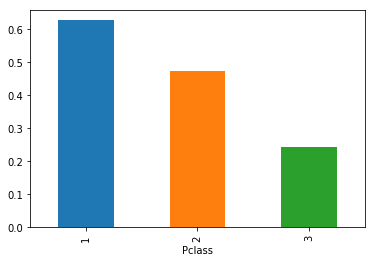

In [20]:
df.groupby('Pclass').Survived.mean().plot(kind = 'bar');

In [21]:
# other way
sur_cls = pd.crosstab(index= df['Pclass'],
                     columns = df['Survived'], normalize = 'index')

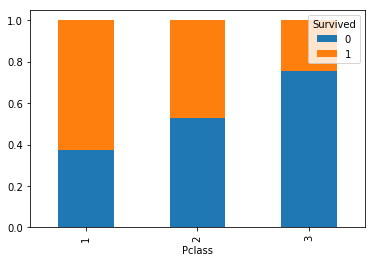

In [22]:
sur_cls.plot(kind= 'bar', stacked = True);


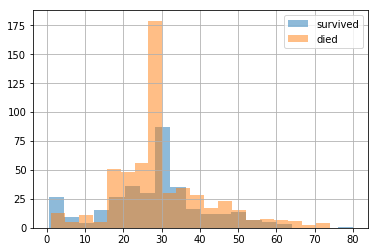

In [23]:
df.Age[survived].hist(label = 'survived', alpha =0.5, bins =20)
df.Age[died].hist(label = 'died', alpha = 0.5, bins=20);
plt.legend();

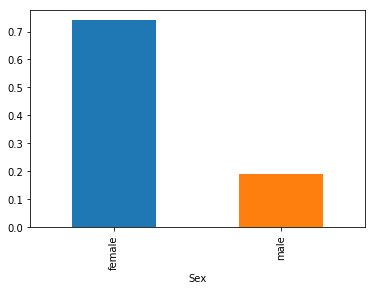

In [24]:
df.groupby('Sex').Survived.mean().plot(kind = 'bar')

In [25]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [26]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          92
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [27]:
df.query('Sex == "female"')['Fare'].median(),df.query('Sex == "male"')['Fare'].median(),




(23.0, 10.5)

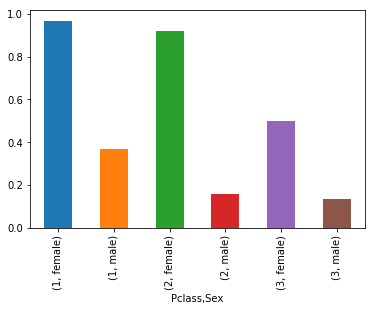

In [28]:
df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind = 'bar')

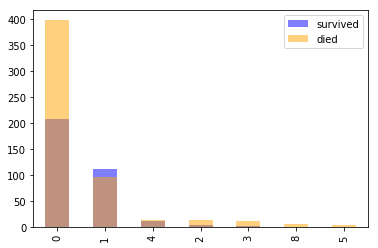

In [29]:
df.SibSp[survived].value_counts().plot(kind ='bar', alpha = 0.5, color = 'blue', label= 'survived');
df.SibSp[died].value_counts().plot(kind ='bar', alpha = 0.5, color = 'orange', label= 'died');
plt.legend();

In [30]:
#other way to do that
alter = pd.crosstab(index=df["SibSp"], 
                          columns=df["Survived"], normalize = 'index')
print(alter)

Survived         0         1
SibSp                       
0         0.656766  0.343234
1         0.464115  0.535885
2         0.535714  0.464286
3         0.750000  0.250000
4         0.833333  0.166667
5         1.000000  0.000000
8         1.000000  0.000000


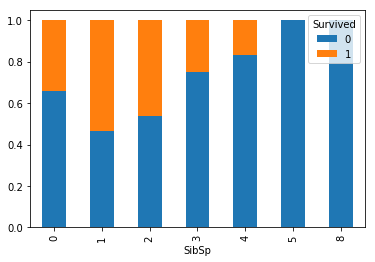

In [31]:
alter.plot(kind="bar", 
                 figsize=(6,4),
                 stacked=True,)

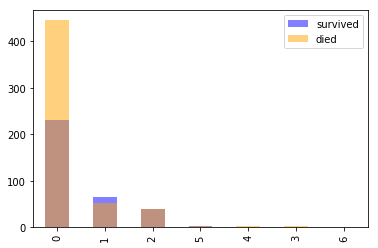

In [32]:
df.Parch[survived].value_counts().plot(kind ='bar', alpha = 0.5, color = 'blue', label= 'survived');
df.Parch[died].value_counts().plot(kind ='bar', alpha = 0.5, color = 'orange', label= 'died');
plt.legend();

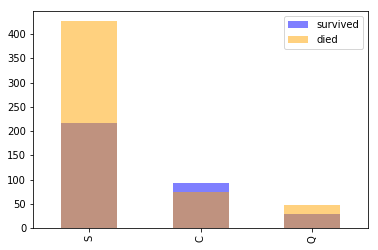

In [33]:
df.Embarked[survived].value_counts().plot(kind ='bar', alpha = 0.5, color = 'blue', label= 'survived');
df.Embarked[died].value_counts().plot(kind ='bar', alpha = 0.5, color = 'orange', label= 'died');
plt.legend();

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

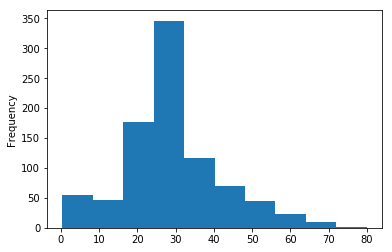

In [37]:
df.Age.plot(kind = 'hist')

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
lreg1 = smf.logit(formula = 'Survived ~ Age', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.662439
         Iterations 4


In [40]:
print(lreg1.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Sep 2018   Pseudo R-squ.:                0.004228
Time:                        16:25:27   Log-Likelihood:                -588.91
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                   0.02533
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1252      0.173     -0.725      0.468      -0.464       0.213
Age           -0.0120      0.005     -2.219      0.027      -0.023      -0.001


In [41]:
lreg1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.004    
Dependent Variable: Survived         AIC:              1181.8167
Date:               2018-09-24 16:26 BIC:              1191.3969
No. Observations:   889              Log-Likelihood:   -588.91  
Df Model:           1                LL-Null:          -591.41  
Df Residuals:       887              LLR p-value:      0.025331 
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    -0.1252    0.1727  -0.7253  0.4683  -0.4636   0.2132
Age          -0.0120    0.0054  -2.2186  0.0265  -0.0227  -0.0014
================================================================

"""

In [46]:
np.exp(lreg1.params)

Intercept    0.882301
Age          0.988037
dtype: float64

In [47]:
param = lreg1.params

In [48]:
conf = lreg1.conf_int()

In [49]:
conf

,0,1
Intercept,-0.463620,0.213175
Age,-0.022667,-0.001403


In [51]:
conf['OR'] = param

In [52]:
conf.columns = ['l', 'u', 'or']

In [53]:
np.exp(conf)

,l,u,or
Intercept,0.629003,1.237602,0.882301
Age,0.977588,0.998598,0.988037
